<a href="https://colab.research.google.com/github/stefanoridolfi/Coding_ML/blob/master/perceptron_stefano2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

epoca 0 Errori= 298
epoca 1 Errori= 240
epoca 2 Errori= 258
epoca 3 Errori= 213
epoca 4 Errori= 270
epoca 5 Errori= 219
epoca 6 Errori= 230
epoca 7 Errori= 239
epoca 8 Errori= 218
epoca 9 Errori= 209
epoca 10 Errori= 210
epoca 11 Errori= 201
epoca 12 Errori= 198
epoca 13 Errori= 228
epoca 14 Errori= 213
epoca 15 Errori= 194
epoca 16 Errori= 203
epoca 17 Errori= 198
epoca 18 Errori= 213
epoca 19 Errori= 165
epoca 20 Errori= 204
epoca 21 Errori= 193
epoca 22 Errori= 209
epoca 23 Errori= 190
epoca 24 Errori= 179
epoca 25 Errori= 188
epoca 26 Errori= 219
epoca 27 Errori= 187
epoca 28 Errori= 174
epoca 29 Errori= 196
epoca 30 Errori= 187
epoca 31 Errori= 185
epoca 32 Errori= 184
epoca 33 Errori= 191
epoca 34 Errori= 193
epoca 35 Errori= 182
epoca 36 Errori= 172
epoca 37 Errori= 163
epoca 38 Errori= 188
epoca 39 Errori= 189
epoca 40 Errori= 199
epoca 41 Errori= 196
epoca 42 Errori= 172
epoca 43 Errori= 165
epoca 44 Errori= 158
epoca 45 Errori= 179
epoca 46 Errori= 150
epoca 47 Errori= 158
ep

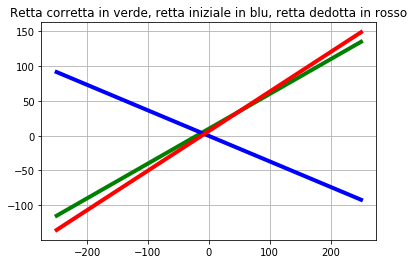

<Figure size 360x1080 with 0 Axes>

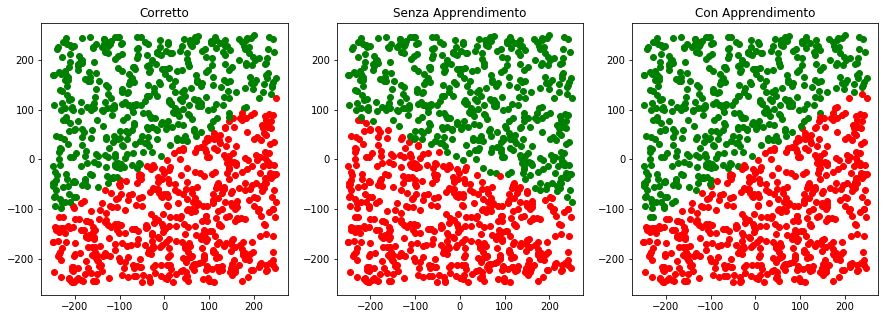

In [15]:
 import matplotlib.pyplot as pl
 import random


 # genera la retta di riferimento, com m=0.5 e q=10
 def f(x):
   return 0.5*x + 10 # linea retta: f(x) = 0.5x + 10

# Funzione che genera n punti casuali con x compresa fra -250 2 250
def generaPunti(n):
    l=[]
    for i in range(0, n+1):
        x = random.random()*500-250
        y = random.random()*500-250
        l.append([x,y])
    return l

 # Activation function
def activate(num):
  if num > 0:
    return 1
  else:
   return -1        

# genero pesi
weights = []
weights_start = []
for x in range(0, 3):
  weights.append(random.random()*2-1)
  weights_start.append(weights[x])




n=10000
it=100
speed=0.01
for i in range(0,it+1):
            errTot = 0 # Il conteggio degli errori riparte da zero
            for x in range(0, n ):
                # Generiamo un punto a caso nel range di coordinate -250 +250 
                x_coord = random.random()*500-250
                y_coord = random.random()*500-250
                inputs=[x_coord, y_coord, 1]
                # Verifichiamo il reale posizionamento del punto rispetto alla retta
                line_y = f(x_coord)
                if y_coord > line_y: # Il punto è sopra la linea: valore atteso = 1
                    desired_output = 1
                else: # Il punto è sopra la linea: valore atteso = -1
                    desired_output = -1
                # Chiamiamo la funzione di back propagation e incrementiamo il conteggio errori
                sum = 0
                for x in range(0, len(weights)):
                  sum += weights[x] * inputs[x]
        
                guess = activate(sum)   # Calcolo il valore di output relativo agli input forniti
                error = desired_output - guess      # Calcolo l'errore come differenza tra valore in output e valore atteso
                # La correzione dei pesi avviene secondo la formula
                # peso = peso + errore*valore_input*learn_speed
                # se l'errore è pari a zero la formula non altera il valore del peso
                for x in range(0, len(weights)):
                  weights[x] += error*inputs[x]*speed
                #print("Addestramento in corso, m, q  :",-self.weights[0]/self.weights[1],-self.weights[2]/self.weights[1] )
                # Restituiamo 0 se la previsione è stata corretta, 1 altrimenti
                # questo dato servirà più avanti per conteggiare gli errori durante il processo di apprendimento
                if error != 0:
                   errTot+=1
            print("epoca", i, "Errori=",errTot)
                
            # Al termine del sottociclo di punti visualizziamo il valore del contatore errori
            #print("Iterazione:",i,"Errori:",errTot)
print("Errori %=",(errTot/n)*100)
print("\n\nParametri iniziali a, b , c della retta (ovvero i pesi generati casualmennte) :",weights_start )
print("Parametri inizial m, q:",-weights_start[0]/weights_start[1],-weights_start[2]/weights_start[1])
print("Parametri finali a, b , c della retta :",weights[0], weights[1], weights[2])
print("Parametri corretti: m=0.5  q=10\nParametri ottenuti: m=",-weights[0]/weights[1]," q=",-weights[2]/weights[1],"\n\n")


# Disegno la retta corretta 
import matplotlib.pyplot as pl
lx=[]
ly=[]
for x in range(-250,251):
  y=f(x)
  lx.append(x)
  ly.append(y)
pl.plot(lx,ly, color='green',linewidth=4.0)

# disegno la retta i cui coefficienti sono i pesi iniziali + il BIAS
import matplotlib.pyplot as pl
llx=[]
lly=[]
for x in range(-250,251):
  y=(-weights_start[0]/weights_start[1])*x -(weights_start[2]/weights_start[1])
  llx.append(x)
  lly.append(y)
pl.plot(llx,lly,color='blue',linewidth=4.0)



# disegno la retta i cui coefficienti sono i pesi finali + il BIAS
import matplotlib.pyplot as pl
llx=[]
lly=[]
for x in range(-250,251):
  y=(-weights[0]/weights[1])*x -(weights[2]/weights[1])
  llx.append(x)
  lly.append(y)
pl.plot(llx,lly,color='red',linewidth=4.0)
pl.title("Retta corretta in verde, retta iniziale in blu, retta dedotta in rosso")
pl.grid(True)
pl.figure(figsize=(5,15))
pl.show()

# Creiamo una lista di 100 punti casuali
listaPunti = generaPunti(1000)


fig, (ax1, ax2, ax3) = pl.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)
# Disegniamo i punti della lista,  in rosso se si trovano al di
# sotto della retta originale corretta e in verde se si trovano al disopra. Visualizza la classficazione corretta
for punto in listaPunti:
    y_linea=f(punto[0])
    if punto[1] > y_linea:
        formato = 'go'
    else:
        formato = 'ro'
    ax1.plot(punto[0],punto[1],formato)
ax1.set_title('Corretto')



# Disegniamo i punti della lista,  in rosso se si trovano al di
# sotto della retta generata dai pesi originali,  e in verde se si trovano al disopra. Visualizza la classficazione prima dell'addestramento
for punto in listaPunti:
    y_linea=(-weights_start[0]/weights_start[1])*punto[0] -(weights_start[2]/weights_start[1])
    if punto[1] > y_linea:
        formato = 'go'
    else:
        formato = 'ro'
    ax2.plot(punto[0],punto[1],formato)
ax2.set_title('Senza Apprendimento')


# Disegniamo i punti della lista,  in rosso se si trovano al di
# sotto della retta generata dai pesi finali,  e in verde se si trovano al disopra. Visualizza la classficazione dopo l'addestramento
for punto in listaPunti:
    y_linea=(-weights[0]/weights[1])*punto[0] -(weights[2]/weights[1])
    if punto[1] > y_linea:
        formato = 'go'
    else:
        formato = 'ro'
    ax3.plot(punto[0],punto[1],formato)
ax3.set_title('Con Apprendimento')

pl.show()